## DATA PREP

In [4]:
from vnstock import *
import pandas as pd
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [5]:
kdc_df = stock_historical_data(symbol="KDC", start_date="2022-04-01", end_date="2024-04-20", resolution="1D", type="stock")
kdc_prices = kdc_df[['time', 'close']]
kdc_prices.head()

,time,close
0,2022-04-01,51880
1,2022-04-04,52460
2,2022-04-05,52280
3,2022-04-06,52180
4,2022-04-07,51980


In [3]:
mkt_df = stock_historical_data(symbol="VNINDEX", start_date="2022-04-01", end_date="2024-04-20", resolution="1D", type="index")
mkt_prices = mkt_df[['time','close']]
mkt_prices.head()

,time,close
0,2022-04-01,1516440
1,2022-04-04,1524700
2,2022-04-05,1520030
3,2022-04-06,1522900
4,2022-04-07,1502350


In [4]:
rf_df = pd.read_excel('ket_qua_dau_thau_theo_dot.xlsx')
rf_df.rename(columns = {
    'Ngày TCPH': 'time',
    'Lãi suất trúng thầu (%/y)': 'close'
}, inplace = True)
rf_prices = rf_df.loc[rf_df['Kỳ hạn\n(năm)'] == 5, ['time', 'close']]
rf_prices = rf_prices[rf_prices['close'] != '-']
rf_prices.sort_values(by = 'time', ascending= False).head(20)

,time,close
1,2024-04-17,1.56
6,2024-04-10,1.53
9,2024-04-03,1.5
24,2024-03-13,1.47
27,2024-03-06,1.44
31,2024-02-28,1.42
37,2024-02-21,1.41
41,2024-02-07,1.4
45,2024-01-31,1.39
49,2024-01-24,1.37


In [5]:
stock_evaluation (symbol='TCB', period=1, time_window='D').head()

,ticker,fromDate,toDate,PE,PB,industryPE,vnindexPE,industryPB,vnindexPB
0,TCB,2023-04-20,2023-04-20,5.7,0.8,8.3,12.0,1.4,1.5
1,TCB,2023-04-21,2023-04-21,5.7,0.8,8.2,12.0,1.5,1.6
2,TCB,2023-04-24,2023-04-24,5.8,0.8,8.2,11.8,1.5,1.5
3,TCB,2023-04-25,2023-04-25,5.7,0.8,8.2,11.8,1.5,1.5
4,TCB,2023-04-26,2023-04-26,5.9,0.9,8.3,11.9,1.5,1.6


In [6]:
company_overview('TCB')

,ticker,exchange,industry,companyType,noShareholders,foreignPercent,outstandingShare,issueShare,establishedYear,noEmployees,stockRating,deltaInWeek,deltaInMonth,deltaInYear,shortName,industryEn,industryID,industryIDv2,website
0,TCB,HOSE,Ngân hàng,NH,1901,0.225,3522.5,3522.5,1993,11742,3.3,0.053,0.165,0.413,Techcombank,Banks,289,8355,https://techcombank.com


In [7]:
full_df = listing_companies()[['ticker']]
full_df.head()

,ticker
0,SSI
1,BCM
2,VHM
3,VIC
4,VRE


In [21]:
import numpy as np
from tqdm import tqdm

full_df = listing_companies()[['ticker']]

for idx, ticker in tqdm(enumerate(full_df['ticker']), total = full_df.shape[0]):
    try:    
        full_df.loc[idx, 'price_to_book']=stock_evaluation (symbol=ticker, period=1, time_window='D').loc[0, 'PB']
    except:
        full_df.loc[idx, 'price_to_book'] = np.nan
    
    try:
        full_df.loc[idx, 'n_shares']= company_overview(ticker)['outstandingShare'].iloc[0]
    except:
        full_df.loc[idx, 'n_shares'] = np.nan
        
    try:
        price_df=stock_historical_data(symbol=ticker, 
                                            start_date="2022-04-01", 
                                            end_date="2024-04-20",
                                            resolution="1D", 
                                            type="stock")
        full_df.loc[idx, 'price'] = price_df.loc[0, 'close'] 
        full_df.loc[idx, 'n_obs'] = price_df.shape[0]
    except:
        full_df.loc[idx, 'price'] = np.nan
        full_df.loc[idx, 'n_obs'] = np.nan

    full_df.loc[idx, 'mkt_cap']=full_df.loc[idx, 'n_shares'] * full_df.loc[idx, 'price']



 11%|█         | 176/1607 [03:06<20:45,  1.15it/s] 

Error in API response 



 16%|█▌        | 257/1607 [04:20<17:22,  1.29it/s]

Error in API response 



 17%|█▋        | 281/1607 [04:42<19:08,  1.15it/s]

Error in API response 



 18%|█▊        | 297/1607 [04:55<17:59,  1.21it/s]

Error in API response 



 22%|██▏       | 361/1607 [06:00<19:37,  1.06it/s]

Error in API response 



 39%|███▊      | 621/1607 [10:19<11:36,  1.41it/s]

Error in API response 



 41%|████      | 662/1607 [10:55<13:19,  1.18it/s]

Error in API response 



 43%|████▎     | 685/1607 [11:13<10:49,  1.42it/s]

Error in API response 



 51%|█████▏    | 827/1607 [13:34<12:13,  1.06it/s]

Error in API response 



 55%|█████▍    | 879/1607 [14:18<08:27,  1.43it/s]

Error in API response 



 61%|██████▏   | 987/1607 [16:03<08:32,  1.21it/s]

Error in API response 



 64%|██████▎   | 1022/1607 [16:31<08:19,  1.17it/s]

Error in API response 



 69%|██████▉   | 1114/1607 [18:07<12:52,  1.57s/it]

Error in API response 



 80%|███████▉  | 1280/1607 [20:40<04:38,  1.18it/s]

Error in API response 



 92%|█████████▏| 1483/1607 [24:00<01:50,  1.12it/s]

Error in API response 



 93%|█████████▎| 1495/1607 [24:12<01:35,  1.17it/s]

Error in API response 



100%|██████████| 1607/1607 [25:56<00:00,  1.03it/s]


In [26]:
full_df.isna().sum()

ticker           0
price_to_book    0
n_shares         0
price            0
n_obs            0
mkt_cap          0
dtype: int64

In [35]:
full_df.dropna(inplace = True)
full_df = full_df[full_df['n_obs'] > 400]
full_df.shape[0]

600

In [36]:
full_df.to_pickle('full_df.pkl')

In [37]:
print(kdc_prices.shape)
print(mkt_prices.shape)
print(rf_prices.shape)

(514, 2)
(512, 2)
(452, 2)


In [79]:
import pandas as pd

# Sort full_df based on market capitalization for small/big and book-to-price ratio for high/low
full_df_small_big = full_df.sort_values(by='mkt_cap')
full_df_high_low = full_df.sort_values(by='price_to_book', ascending=False)

# Select lowest and highest 20% stocks for small/big and high/low categories
num_stocks = int(0.1 * len(full_df))
small = full_df_small_big.head(num_stocks)
big = full_df_small_big.tail(num_stocks)
high = full_df_high_low.head(num_stocks)
low = full_df_high_low.tail(num_stocks)

# Load data for small, big, high, and low stocks
small_dfs = []
big_dfs = []
high_dfs = []
low_dfs = []

for ticker in small['ticker']:
    stock_df = stock_historical_data(symbol=ticker, start_date="2022-04-01", end_date="2024-04-20", resolution="1D", type="stock")
    small_dfs.append(stock_df[['time', 'close', 'volume']].rename(columns={'close': f'SMALL_pri_{ticker}',
                                                                            'volume': f'SMALL_vol_{ticker}'}))

for ticker in big['ticker']:
    stock_df = stock_historical_data(symbol=ticker, start_date="2022-04-01", end_date="2024-04-20", resolution="1D", type="stock")
    big_dfs.append(stock_df[['time', 'close', 'volume']].rename(columns={'close': f'BIG_pri_{ticker}',
                                                                            'volume': f'BIG_vol_{ticker}'}))

for ticker in high['ticker']:
    stock_df = stock_historical_data(symbol=ticker, start_date="2022-04-01", end_date="2024-04-20", resolution="1D", type="stock")
    high_dfs.append(stock_df[['time', 'close', 'volume']].rename(columns={'close': f'HIGH_pri_{ticker}',
                                                                            'volume': f'HIGH_vol_{ticker}'}))

for ticker in low['ticker']:
    stock_df = stock_historical_data(symbol=ticker, start_date="2022-04-01", end_date="2024-04-20", resolution="1D", type="stock")
    low_dfs.append(stock_df[['time', 'close', 'volume']].rename(columns={'close': f'LOW_pri_{ticker}',
                                                                            'volume': f'LOW_vol_{ticker}'}))

# Merge all DataFrames
merged_df = kdc_prices.copy()

# Merge small stocks
for df in tqdm(small_dfs, desc='Small'):
    df = df.loc[~df['time'].duplicated(keep='last')]
    merged_df = pd.merge(merged_df, df, on='time', how='left')

# Merge big stocks
for df in tqdm(big_dfs, desc='Big'):
    df = df.loc[~df['time'].duplicated(keep='last')]
    merged_df = pd.merge(merged_df, df, on='time', how='left')

# Merge high stocks
for df in tqdm(high_dfs, desc='High'):
    df = df.loc[~df['time'].duplicated(keep='last')]
    merged_df = pd.merge(merged_df, df, on='time', how='left')

# Merge low stocks
for df in tqdm(low_dfs, desc='Low'):
    df = df.loc[~df['time'].duplicated(keep='last')]
    merged_df = pd.merge(merged_df, df, on='time', how='left')

# Print first few rows of the merged DataFrame
merged_df.head()



Low: 100%|██████████| 60/60 [00:00<00:00, 155.01it/s]


,time,close,SMALL_pri_PCF,SMALL_vol_PCF,SMALL_pri_BTN,SMALL_vol_BTN,SMALL_pri_MCO,SMALL_vol_MCO,SMALL_pri_L45,SMALL_vol_L45,SMALL_pri_ICF,SMALL_vol_ICF,SMALL_pri_ALV,SMALL_vol_ALV,SMALL_pri_C92,SMALL_vol_C92,SMALL_pri_CAR,SMALL_vol_CAR,SMALL_pri_CET,SMALL_vol_CET,SMALL_pri_VTA,SMALL_vol_VTA,SMALL_pri_TXM,SMALL_vol_TXM,SMALL_pri_NBE,SMALL_vol_NBE,SMALL_pri_APP,SMALL_vol_APP,SMALL_pri_CGV,SMALL_vol_CGV,SMALL_pri_SRB,SMALL_vol_SRB,SMALL_pri_MTL,SMALL_vol_MTL,SMALL_pri_HMR,SMALL_vol_HMR,SMALL_pri_PTS,SMALL_vol_PTS,SMALL_pri_BVG,SMALL_vol_BVG,SMALL_pri_TSB,SMALL_vol_TSB,SMALL_pri_TIE,SMALL_vol_TIE,SMALL_pri_DXV,SMALL_vol_DXV,SMALL_pri_L12,SMALL_vol_L12,SMALL_pri_HU3,SMALL_vol_HU3,SMALL_pri_VMG,SMALL_vol_VMG,SMALL_pri_BIG,SMALL_vol_BIG,SMALL_pri_DC2,SMALL_vol_DC2,SMALL_pri_MCF,SMALL_vol_MCF,SMALL_pri_MGC,SMALL_vol_MGC,SMALL_pri_KTS,SMALL_vol_KTS,SMALL_pri_NST,SMALL_vol_NST,SMALL_pri_VSE,SMALL_vol_VSE,SMALL_pri_HD2,SMALL_vol_HD2,SMALL_pri_VTB,SMALL_vol_VTB,SMALL_pri_XMD,SMALL_vol_XMD,SMALL_pri_HVA,SMALL_vol_HVA,SMALL_pri_PGN,SMALL_vol_PGN,SMALL_pri_HD8,SMALL_vol_HD8,SMALL_pri_DTC,SMALL_vol_DTC,SMALL_pri_MLS,SMALL_vol_MLS,SMALL_pri_KCB,SMALL_vol_KCB,SMALL_pri_VLG,SMALL_vol_VLG,SMALL_pri_PPP,SMALL_vol_PPP,SMALL_pri_PWA,SMALL_vol_PWA,SMALL_pri_MAC,SMALL_vol_MAC,SMALL_pri_SHE,SMALL_vol_SHE,SMALL_pri_YBM,SMALL_vol_YBM,SMALL_pri_SD3,SMALL_vol_SD3,SMALL_pri_KSD,SMALL_vol_KSD,SMALL_pri_SD2,SMALL_vol_SD2,SMALL_pri_LPT,SMALL_vol_LPT,SMALL_pri_GMX,SMALL_vol_GMX,SMALL_pri_AAM,SMALL_vol_AAM,SMALL_pri_POV,SMALL_vol_POV,SMALL_pri_GTA,SMALL_vol_GTA,SMALL_pri_DTI,SMALL_vol_DTI,SMALL_pri_V21,SMALL_vol_V21,SMALL_pri_PBP,SMALL_vol_PBP,SMALL_pri_PXT,SMALL_vol_PXT,SMALL_pri_PIT,SMALL_vol_PIT,BIG_pri_FOX,BIG_vol_FOX,BIG_pri_MML,BIG_vol_MML,BIG_pri_REE,BIG_vol_REE,BIG_pri_CEO,BIG_vol_CEO,BIG_pri_PNJ,BIG_vol_PNJ,BIG_pri_KBC,BIG_vol_KBC,BIG_pri_HUT,BIG_vol_HUT,BIG_pri_KSF,BIG_vol_KSF,BIG_pri_GEX,BIG_vol_GEX,BIG_pri_PGV,BIG_vol_PGV,BIG_pri_LPB,BIG_vol_LPB,BIG_pri_MSR,BIG_vol_MSR,BIG_pri_KDH,BIG_vol_KDH,BIG_pri_DGC,BIG_vol_DGC,BIG_pri_POW,BIG_vol_POW,BIG_pri_SSH,BIG_vol_SSH,BIG_pri_VND,BIG_vol_VND,BIG_pri_VEF,BIG_vol_VEF,BIG_pri_MSB,BIG_vol_MSB,BIG_pri_MVN,BIG_vol_MVN,BIG_pri_BVH,BIG_vol_BVH,BIG_pri_EIB,BIG_vol_EIB,BIG_pri_DIG,BIG_vol_DIG,BIG_pri_PDR,BIG_vol_PDR,BIG_pri_VEA,BIG_vol_VEA,BIG_pri_HVN,BIG_vol_HVN,BIG_pri_SSI,BIG_vol_SSI,BIG_pri_HDB,BIG_vol_HDB,BIG_pri_TPB,BIG_vol_TPB,BIG_pri_THD,BIG_vol_THD,BIG_pri_SHB,BIG_vol_SHB,BIG_pri_STB,BIG_vol_STB,BIG_pri_PLX,BIG_vol_PLX,BIG_pri_VIB,BIG_vol_VIB,BIG_pri_SSB,BIG_vol_SSB,BIG_pri_BCM,BIG_vol_BCM,BIG_pri_VJC,BIG_vol_VJC,BIG_pri_BSR,BIG_vol_BSR,BIG_pri_VRE,BIG_vol_VRE,BIG_pri_MCH,BIG_vol_MCH,BIG_pri_ACB,BIG_vol_ACB,BIG_pri_FPT,BIG_vol_FPT,BIG_pri_SAB,BIG_vol_SAB,BIG_pri_VGI,BIG_vol_VGI,BIG_pri_MWG,BIG_vol_MWG,BIG_pri_MBB,BIG_vol_MBB,BIG_pri_GVR,BIG_vol_GVR,BIG_pri_VNM,BIG_vol_VNM,BIG_pri_CTG,BIG_vol_CTG,BIG_pri_NVL,BIG_vol_NVL,BIG_pri_MSN,BIG_vol_MSN,BIG_pri_TCB,BIG_vol_TCB,BIG_pri_VPB,BIG_vol_VPB,BIG_pri_GAS,BIG_vol_GAS,BIG_pri_HPG,BIG_vol_HPG,BIG_pri_ACV,BIG_vol_ACV,BIG_pri_BID,BIG_vol_BID,BIG_pri_VIC,BIG_vol_VIC,BIG_pri_VHM,BIG_vol_VHM,BIG_pri_VCB,BIG_vol_VCB,HIGH_pri_VC9,HIGH_vol_VC9,HIGH_pri_AST,HIGH_vol_AST,HIGH_pri_LIC,HIGH_vol_LIC,HIGH_pri_OGC,HIGH_vol_OGC,HIGH_pri_SSH,HIGH_vol_SSH,HIGH_pri_MLS,HIGH_vol_MLS,HIGH_pri_SCG,HIGH_vol_SCG,HIGH_pri_BCM,HIGH_vol_BCM,HIGH_pri_CSI,HIGH_vol_CSI,HIGH_pri_VUA,HIGH_vol_VUA,HIGH_pri_FRT,HIGH_vol_FRT,HIGH_pri_DRL,HIGH_vol_DRL,HIGH_pri_SAB,HIGH_vol_SAB,HIGH_pri_VNM,HIGH_vol_VNM,HIGH_pri_VEF,HIGH_vol_VEF,HIGH_pri_MSN,HIGH_vol_MSN,HIGH_pri_CTR,HIGH_vol_CTR,HIGH_pri_NCT,HIGH_vol_NCT,HIGH_pri_HTP,HIGH_vol_HTP,HIGH_pri_ACV,HIGH_vol_ACV,HIGH_pri_VJC,HIGH_vol_VJC,HIGH_pri_VPI,HIGH_vol_VPI,HIGH_pri_HUT,HIGH_vol_HUT,HIGH_pri_L14,HIGH_vol_L14,HIGH_pri_KOS,HIGH_vol_KOS,HIGH_pri_FPT,HIGH_vol_FPT,HIGH_pri_TTF,HIGH_vol_TTF,HIGH_pri_ILS,HIGH_vol_ILS,HIGH_pri_NCS,HIGH_vol_NCS,HIGH_pri_DSC,HIGH_vol_DSC,HIGH_pri_CTF,HIGH_vol_CTF,HIGH_pri_NVT,HIGH_vol_NVT,HIGH_pri_GKM,HIGH_vol_GKM,HIGH_pri_L

In [82]:
merged_df['time'] = pd.to_datetime(merged_df['time'])
merged_df.rename(columns = {'close':'KDC'}, inplace = True)

mkt_prices['time'] = pd.to_datetime(mkt_prices['time'])
merged_df = merged_df.merge(mkt_prices, on = 'time', how = 'left')
merged_df.rename(columns = {'close':'MKT'}, inplace = True)

merged_df = merged_df.merge(rf_prices, on = 'time', how = 'left')
merged_df.rename(columns = {'close':'RF'}, inplace = True)

# Forward fill NaN values within each column
merged_df.ffill(inplace=True)

# Backward fill NaN values within each column, but starting from the end
merged_df.bfill(inplace=True)

# Print the DataFrame with NaN values filled
merged_df.isna().sum()


C:\Users\tuanl\AppData\Local\Temp\ipykernel_19788\3273509266.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_prices['time'] = pd.to_datetime(mkt_prices['time'])


time                0
KDC                 0
SMALL_pri_PCF       0
SMALL_vol_PCF       0
SMALL_pri_BTN       0
SMALL_vol_BTN       0
SMALL_pri_MCO       0
SMALL_vol_MCO       0
SMALL_pri_L45       0
SMALL_vol_L45       0
SMALL_pri_ICF       0
SMALL_vol_ICF       0
SMALL_pri_ALV       0
SMALL_vol_ALV       0
SMALL_pri_C92       0
SMALL_vol_C92       0
SMALL_pri_CAR       0
SMALL_vol_CAR       0
SMALL_pri_CET       0
SMALL_vol_CET       0
SMALL_pri_VTA       0
SMALL_vol_VTA       0
SMALL_pri_TXM       0
SMALL_vol_TXM       0
SMALL_pri_NBE       0
SMALL_vol_NBE       0
SMALL_pri_APP       0
SMALL_vol_APP       0
SMALL_pri_CGV       0
SMALL_vol_CGV       0
SMALL_pri_SRB       0
SMALL_vol_SRB       0
SMALL_pri_MTL       0
SMALL_vol_MTL       0
SMALL_pri_HMR       0
SMALL_vol_HMR       0
SMALL_pri_PTS       0
SMALL_vol_PTS       0
SMALL_pri_BVG       0
SMALL_vol_BVG       0
SMALL_pri_TSB       0
SMALL_vol_TSB       0
SMALL_pri_TIE       0
SMALL_vol_TIE       0
SMALL_pri_DXV       0
SMALL_vol_

In [83]:
merged_df.head()

,time,KDC,SMALL_pri_PCF,SMALL_vol_PCF,SMALL_pri_BTN,SMALL_vol_BTN,SMALL_pri_MCO,SMALL_vol_MCO,SMALL_pri_L45,SMALL_vol_L45,SMALL_pri_ICF,SMALL_vol_ICF,SMALL_pri_ALV,SMALL_vol_ALV,SMALL_pri_C92,SMALL_vol_C92,SMALL_pri_CAR,SMALL_vol_CAR,SMALL_pri_CET,SMALL_vol_CET,SMALL_pri_VTA,SMALL_vol_VTA,SMALL_pri_TXM,SMALL_vol_TXM,SMALL_pri_NBE,SMALL_vol_NBE,SMALL_pri_APP,SMALL_vol_APP,SMALL_pri_CGV,SMALL_vol_CGV,SMALL_pri_SRB,SMALL_vol_SRB,SMALL_pri_MTL,SMALL_vol_MTL,SMALL_pri_HMR,SMALL_vol_HMR,SMALL_pri_PTS,SMALL_vol_PTS,SMALL_pri_BVG,SMALL_vol_BVG,SMALL_pri_TSB,SMALL_vol_TSB,SMALL_pri_TIE,SMALL_vol_TIE,SMALL_pri_DXV,SMALL_vol_DXV,SMALL_pri_L12,SMALL_vol_L12,SMALL_pri_HU3,SMALL_vol_HU3,SMALL_pri_VMG,SMALL_vol_VMG,SMALL_pri_BIG,SMALL_vol_BIG,SMALL_pri_DC2,SMALL_vol_DC2,SMALL_pri_MCF,SMALL_vol_MCF,SMALL_pri_MGC,SMALL_vol_MGC,SMALL_pri_KTS,SMALL_vol_KTS,SMALL_pri_NST,SMALL_vol_NST,SMALL_pri_VSE,SMALL_vol_VSE,SMALL_pri_HD2,SMALL_vol_HD2,SMALL_pri_VTB,SMALL_vol_VTB,SMALL_pri_XMD,SMALL_vol_XMD,SMALL_pri_HVA,SMALL_vol_HVA,SMALL_pri_PGN,SMALL_vol_PGN,SMALL_pri_HD8,SMALL_vol_HD8,SMALL_pri_DTC,SMALL_vol_DTC,SMALL_pri_MLS,SMALL_vol_MLS,SMALL_pri_KCB,SMALL_vol_KCB,SMALL_pri_VLG,SMALL_vol_VLG,SMALL_pri_PPP,SMALL_vol_PPP,SMALL_pri_PWA,SMALL_vol_PWA,SMALL_pri_MAC,SMALL_vol_MAC,SMALL_pri_SHE,SMALL_vol_SHE,SMALL_pri_YBM,SMALL_vol_YBM,SMALL_pri_SD3,SMALL_vol_SD3,SMALL_pri_KSD,SMALL_vol_KSD,SMALL_pri_SD2,SMALL_vol_SD2,SMALL_pri_LPT,SMALL_vol_LPT,SMALL_pri_GMX,SMALL_vol_GMX,SMALL_pri_AAM,SMALL_vol_AAM,SMALL_pri_POV,SMALL_vol_POV,SMALL_pri_GTA,SMALL_vol_GTA,SMALL_pri_DTI,SMALL_vol_DTI,SMALL_pri_V21,SMALL_vol_V21,SMALL_pri_PBP,SMALL_vol_PBP,SMALL_pri_PXT,SMALL_vol_PXT,SMALL_pri_PIT,SMALL_vol_PIT,BIG_pri_FOX,BIG_vol_FOX,BIG_pri_MML,BIG_vol_MML,BIG_pri_REE,BIG_vol_REE,BIG_pri_CEO,BIG_vol_CEO,BIG_pri_PNJ,BIG_vol_PNJ,BIG_pri_KBC,BIG_vol_KBC,BIG_pri_HUT,BIG_vol_HUT,BIG_pri_KSF,BIG_vol_KSF,BIG_pri_GEX,BIG_vol_GEX,BIG_pri_PGV,BIG_vol_PGV,BIG_pri_LPB,BIG_vol_LPB,BIG_pri_MSR,BIG_vol_MSR,BIG_pri_KDH,BIG_vol_KDH,BIG_pri_DGC,BIG_vol_DGC,BIG_pri_POW,BIG_vol_POW,BIG_pri_SSH,BIG_vol_SSH,BIG_pri_VND,BIG_vol_VND,BIG_pri_VEF,BIG_vol_VEF,BIG_pri_MSB,BIG_vol_MSB,BIG_pri_MVN,BIG_vol_MVN,BIG_pri_BVH,BIG_vol_BVH,BIG_pri_EIB,BIG_vol_EIB,BIG_pri_DIG,BIG_vol_DIG,BIG_pri_PDR,BIG_vol_PDR,BIG_pri_VEA,BIG_vol_VEA,BIG_pri_HVN,BIG_vol_HVN,BIG_pri_SSI,BIG_vol_SSI,BIG_pri_HDB,BIG_vol_HDB,BIG_pri_TPB,BIG_vol_TPB,BIG_pri_THD,BIG_vol_THD,BIG_pri_SHB,BIG_vol_SHB,BIG_pri_STB,BIG_vol_STB,BIG_pri_PLX,BIG_vol_PLX,BIG_pri_VIB,BIG_vol_VIB,BIG_pri_SSB,BIG_vol_SSB,BIG_pri_BCM,BIG_vol_BCM,BIG_pri_VJC,BIG_vol_VJC,BIG_pri_BSR,BIG_vol_BSR,BIG_pri_VRE,BIG_vol_VRE,BIG_pri_MCH,BIG_vol_MCH,BIG_pri_ACB,BIG_vol_ACB,BIG_pri_FPT,BIG_vol_FPT,BIG_pri_SAB,BIG_vol_SAB,BIG_pri_VGI,BIG_vol_VGI,BIG_pri_MWG,BIG_vol_MWG,BIG_pri_MBB,BIG_vol_MBB,BIG_pri_GVR,BIG_vol_GVR,BIG_pri_VNM,BIG_vol_VNM,BIG_pri_CTG,BIG_vol_CTG,BIG_pri_NVL,BIG_vol_NVL,BIG_pri_MSN,BIG_vol_MSN,BIG_pri_TCB,BIG_vol_TCB,BIG_pri_VPB,BIG_vol_VPB,BIG_pri_GAS,BIG_vol_GAS,BIG_pri_HPG,BIG_vol_HPG,BIG_pri_ACV,BIG_vol_ACV,BIG_pri_BID,BIG_vol_BID,BIG_pri_VIC,BIG_vol_VIC,BIG_pri_VHM,BIG_vol_VHM,BIG_pri_VCB,BIG_vol_VCB,HIGH_pri_VC9,HIGH_vol_VC9,HIGH_pri_AST,HIGH_vol_AST,HIGH_pri_LIC,HIGH_vol_LIC,HIGH_pri_OGC,HIGH_vol_OGC,HIGH_pri_SSH,HIGH_vol_SSH,HIGH_pri_MLS,HIGH_vol_MLS,HIGH_pri_SCG,HIGH_vol_SCG,HIGH_pri_BCM,HIGH_vol_BCM,HIGH_pri_CSI,HIGH_vol_CSI,HIGH_pri_VUA,HIGH_vol_VUA,HIGH_pri_FRT,HIGH_vol_FRT,HIGH_pri_DRL,HIGH_vol_DRL,HIGH_pri_SAB,HIGH_vol_SAB,HIGH_pri_VNM,HIGH_vol_VNM,HIGH_pri_VEF,HIGH_vol_VEF,HIGH_pri_MSN,HIGH_vol_MSN,HIGH_pri_CTR,HIGH_vol_CTR,HIGH_pri_NCT,HIGH_vol_NCT,HIGH_pri_HTP,HIGH_vol_HTP,HIGH_pri_ACV,HIGH_vol_ACV,HIGH_pri_VJC,HIGH_vol_VJC,HIGH_pri_VPI,HIGH_vol_VPI,HIGH_pri_HUT,HIGH_vol_HUT,HIGH_pri_L14,HIGH_vol_L14,HIGH_pri_KOS,HIGH_vol_KOS,HIGH_pri_FPT,HIGH_vol_FPT,HIGH_pri_TTF,HIGH_vol_TTF,HIGH_pri_ILS,HIGH_vol_ILS,HIGH_pri_NCS,HIGH_vol_NCS,HIGH_pri_DSC,HIGH_vol_DSC,HIGH_pri_CTF,HIGH_vol_CTF,HIGH_pri_NVT,HIGH_vol_NVT,HIGH_pri_GKM,HIGH_vol_GKM,HIGH_pri_LMH

In [84]:
merged_df.to_excel("merged_df.xlsx", index = False)

## MODEL

In [99]:
from vnstock import *
import pandas as pd
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Calculate returns for KDC and MKT
return_df = pd.read_excel('merged_df.xlsx', sheet_name = 'Data')
return_df.shape

(513, 8)

In [100]:
idx = (return_df['time'] >= pd.to_datetime('2022-04-12')) & (return_df['time'] <= pd.to_datetime('2024-04-10'))

In [101]:
return_df = return_df[idx]

In [69]:
return_df.tail(10)

,time,r_KDC,r_MKT,r_F,r_H,r_L,r_B,r_S
497,2022-04-25,-0.003989,-0.022940,0.023619,-0.021558,-0.038850,-0.035757,-0.028971
498,2022-04-22,0.011524,0.050796,0.023619,0.061757,0.042579,0.065223,0.005781
499,2022-04-21,0.001974,-0.006561,0.023619,0.005647,-0.013091,-0.002720,-0.038552
500,2022-04-20,0.009615,0.010534,0.023619,0.007619,0.048024,-0.003337,0.074284
501,2022-04-19,0.000000,0.015571,0.023619,0.032619,0.039201,0.019768,0.053880
502,2022-04-18,-0.001759,0.018422,0.023619,0.027346,0.052787,0.033543,0.008863
503,2022-04-15,0.009152,0.017959,0.023619,0.014851,0.054555,0.026672,0.030648
504,2022-04-14,-0.011110,0.009254,0.023619,0.007025,0.018361,0.022662,0.014626
505,2022-04-13,0.001958,0.003445,0.023619,0.004822,0.005996,0.007836,0.008971
506,2022-04-12,0.009152,-0.014971,0.023619,-0.019094,-0.014656,-0.021112,-0.006233


In [102]:
kdc_df = stock_historical_data(symbol="KDC", start_date="2022-04-01", end_date="2024-04-22", resolution="1D", type="stock")
kdc_prices = kdc_df[['time', 'close']]
kdc_prices['time'] = pd.to_datetime(kdc_prices['time'])
kdc_prices.head()

C:\Users\tuanl\AppData\Local\Temp\ipykernel_41768\2759146114.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kdc_prices['time'] = pd.to_datetime(kdc_prices['time'])


,time,close
0,2022-04-01,51880
1,2022-04-04,52460
2,2022-04-05,52280
3,2022-04-06,52180
4,2022-04-07,51980


In [103]:
return_df = return_df.merge(kdc_prices, on='time', how='left')

# Renaming the 'close' column to 'p_KDC' in the merged DataFrame
return_df = return_df[~return_df['time'].duplicated()]
return_df.rename(columns={"close": "p_KDC"}, inplace=True)
return_df.shape

(501, 9)

In [104]:
# Calculate HML (High-Minus-Low) factor
return_df['HML'] = (return_df['r_H'] - return_df['r_L']) 

# Calculate SMB (Small-Minus-Big) factor
return_df['SMB'] = (return_df['r_S'] - return_df['r_B'])

return_df['StockRiskPrem'] = (return_df['r_KDC'] - return_df['r_F'])
return_df['MarketRiskPrem'] = (return_df['r_MKT'] - return_df['r_F'])
return_df.head()

,time,r_KDC,r_MKT,r_F,r_H,r_L,r_B,r_S,p_KDC,HML,SMB,StockRiskPrem,MarketRiskPrem
0,2024-04-10,0.000000,0.000286,0.015184,0.003510,0.020675,0.000448,-0.008604,62900,-0.017165,-0.009052,-0.015184,-0.014898
1,2024-04-09,-0.003185,0.003379,0.014889,0.010294,-0.002354,0.008539,-0.002291,62700,0.012648,-0.010830,-0.018073,-0.011510
2,2024-04-08,-0.003195,-0.009924,0.014889,-0.014149,0.013891,-0.013170,-0.000919,62500,-0.028039,0.012251,-0.018084,-0.024812
3,2024-04-05,-0.016129,0.003800,0.014889,0.011930,0.023952,0.005884,0.005251,61500,-0.012022,-0.000633,-0.031018,-0.011089
4,2024-04-04,0.006483,0.010415,0.014889,0.009593,0.025265,0.005394,-0.065847,61900,-0.015673,-0.071241,-0.008406,-0.004474


In [108]:

import statsmodels.api as sm

train_df = return_df.tail(int(len(return_df) * 0.95))
test_df = return_df.head(int(len(return_df) * 0.05))

# Define the dependent and independent variables
X = train_df[['MarketRiskPrem', 'HML', 'SMB']]
y = train_df['StockRiskPrem']

# No constant is added here as r_F acts as our intercept
model = sm.OLS(y, X)
results = model.fit()

# Print out the statistics
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:          StockRiskPrem   R-squared (uncentered):                   0.776
Model:                            OLS   Adj. R-squared (uncentered):              0.775
Method:                 Least Squares   F-statistic:                              545.6
Date:                Mon, 22 Apr 2024   Prob (F-statistic):                   5.86e-153
Time:                        18:27:42   Log-Likelihood:                          1324.9
No. Observations:                 475   AIC:                                     -2644.
Df Residuals:                     472   BIC:                                     -2631.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [84]:
train_df.tail()

,time,r_KDC,r_MKT,r_F,r_H,r_L,r_B,r_S,p_KDC,HML,SMB,StockRiskPrem,MarketRiskPrem,Predicted_Risk_Premium,Predicted_Returns
499,2022-04-18,-0.001759,0.018422,0.023619,0.027346,0.052787,0.033543,0.008863,51120,-0.025441,-0.024679,-0.025378,-0.005197,-0.007412,0.016207
500,2022-04-15,0.009152,0.017959,0.023619,0.014851,0.054555,0.026672,0.030648,51590,-0.039704,0.003976,-0.014467,-0.005660,-0.002823,0.020796
501,2022-04-14,-0.011110,0.009254,0.023619,0.007025,0.018361,0.022662,0.014626,51020,-0.011335,-0.008036,-0.034729,-0.014365,-0.013472,0.010147
502,2022-04-13,0.001958,0.003445,0.023619,0.004822,0.005996,0.007836,0.008971,51120,-0.001175,0.001135,-0.021661,-0.020174,-0.017571,0.006047
503,2022-04-12,0.009152,-0.014971,0.023619,-0.019094,-0.014656,-0.021112,-0.006233,51590,-0.004438,0.014879,-0.014467,-0.038590,-0.031557,-0.007938


In [85]:
initial_price

51590

In [80]:
actual_prices.tail(5)

473    53260
474    53260
475    51890
476    49070
477    48770
Name: p_KDC, dtype: int32

C:\Users\tuanl\AppData\Local\Temp\ipykernel_41768\2965932173.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Predicted_Risk_Premium'] = results.predict(X)[1:][::-1]
C:\Users\tuanl\AppData\Local\Temp\ipykernel_41768\2965932173.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Predicted_Returns'] = train_df['Predicted_Risk_Premium'] + train_df['r_F'][::-1]


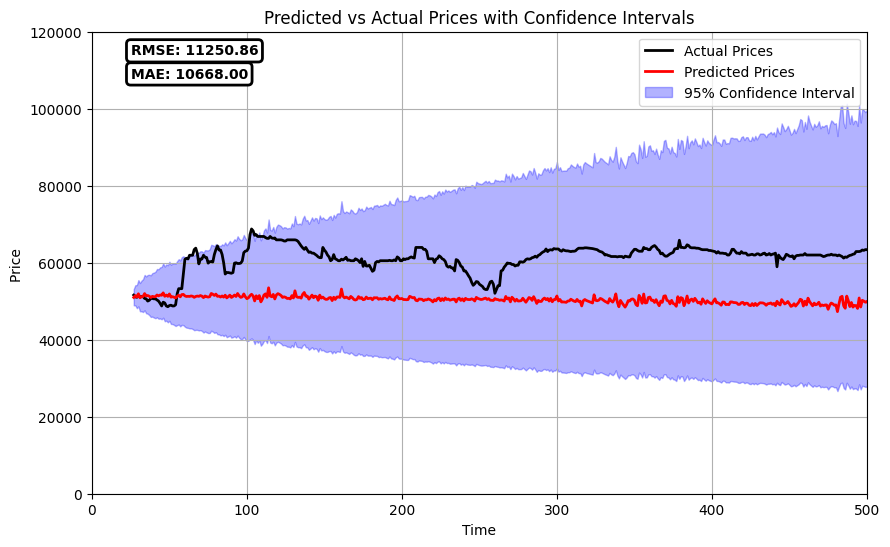

In [117]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Assuming the initial price (the price at the first available data point) is needed:
initial_price = train_df['p_KDC'].iloc[-1]

# Convert log returns to price for actual prices
actual_prices = train_df['p_KDC'][1:][::-1]

# Generate predictions for the training set (assuming these are also log returns)

X = train_df[['MarketRiskPrem', 'HML', 'SMB']]
train_df['Predicted_Risk_Premium'] = results.predict(X)[1:][::-1]
train_df['Predicted_Returns'] = train_df['Predicted_Risk_Premium'] + train_df['r_F'][::-1]

# Calculate the prediction standard errors and confidence intervals
prediction_std, lower, upper = wls_prediction_std(results, exog=X, alpha=0.05)  # 95% confidence
prediction_std = prediction_std[::-1]
# Convert lower and upper log return bounds to price
prediction_var_cum = (prediction_std ** 2).cumsum()[1:]
prediction_mean_cum = train_df['Predicted_Returns'][1:]

# Convert predicted log returns to predicted prices
predicted_prices = np.exp(prediction_mean_cum - 1/2 * prediction_var_cum) * initial_price
lower_price = np.exp(prediction_mean_cum - 1.96 * prediction_var_cum ** .5) * initial_price
upper_price = np.exp(prediction_mean_cum + 1.96 * prediction_var_cum ** .5) * initial_price

# Calculate RMSE
rmse = np.sqrt(np.mean((predicted_prices - actual_prices)**2))

# Calculate MAE
mae = np.mean(np.abs(predicted_prices - actual_prices))




# Plotting the actual values, predicted values, and confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(train_df.index[1:], actual_prices, color='black', label='Actual Prices', linewidth=2)
plt.plot(train_df.index[1:], predicted_prices, color='red', label='Predicted Prices', linewidth=2)
plt.fill_between(train_df.index[1:], lower_price, upper_price, color='blue', alpha=0.3, label='95% Confidence Interval')
plt.title('Predicted vs Actual Prices with Confidence Intervals')
plt.xlabel('Time')
plt.ylabel("Price ")
plt.legend()
plt.grid(True)
plt.xlim(0, 500)  # Adjust this limit as necessary for your dataset
plt.ylim(0, 1.2e5)

# Annotating the RMSE and MAE on the plot
bbox_props = dict(boxstyle="round,pad=0.3", ec="black", fc="white", lw=2)
plt.annotate(f'RMSE: {rmse:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, color='black', fontweight='bold', bbox=bbox_props)
plt.annotate(f'MAE: {mae:.2f}', xy=(0.05, 0.90), xycoords='axes fraction', fontsize=10, color='black', fontweight='bold', bbox=bbox_props)

plt.show()



In [120]:
train_df.head()

,time,r_KDC,r_MKT,r_F,r_H,r_L,r_B,r_S,p_KDC,HML,SMB,StockRiskPrem,MarketRiskPrem,Predicted_Risk_Premium,Predicted_Returns
26,2024-03-05,0.000000,0.005725,0.0141,0.012783,0.006644,0.013051,-0.048509,63500,0.006139,-0.061560,-0.014100,-0.008375,NaN,NaN
27,2024-03-04,0.000000,-0.006771,0.0141,-0.018502,-0.018988,-0.003860,-0.050252,63500,0.000486,-0.046392,-0.014100,-0.020871,-0.025615,-0.011515
28,2024-03-01,-0.001576,-0.002484,0.0141,-0.005687,-0.006611,-0.003865,-0.014299,63400,0.000923,-0.010434,-0.015676,-0.016585,-0.016280,-0.002180
29,2024-02-29,-0.003160,-0.004421,0.0141,-0.008458,-0.000781,-0.006377,-0.055307,63200,-0.007677,-0.048930,-0.017260,-0.018521,-0.023616,-0.009516
30,2024-02-28,0.003160,0.001452,0.0141,-0.007260,0.000489,0.000877,0.026407,63400,-0.007748,0.025530,-0.010941,-0.012648,-0.006897,0.007203


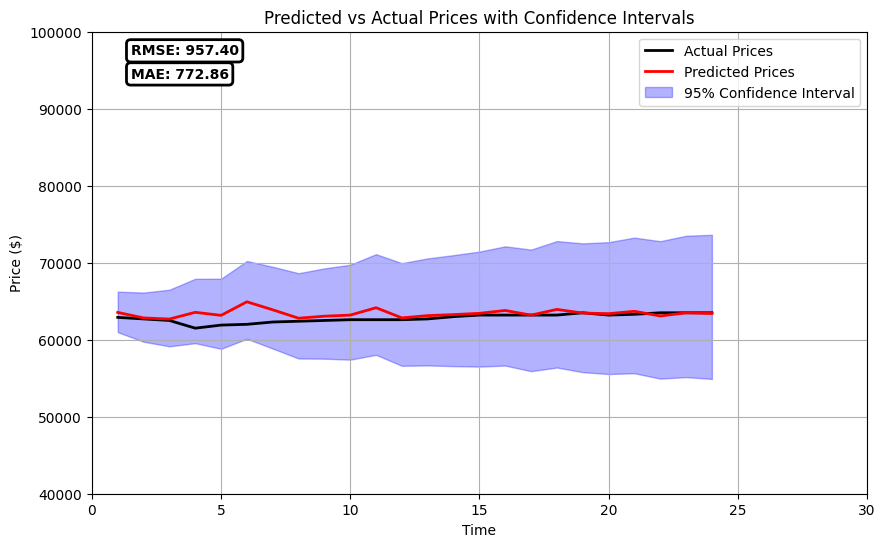

In [123]:
# Assuming the initial price (the last available in training data) is needed:
initial_price = train_df['p_KDC'].iloc[0]

import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Convert log returns to price for actual prices
actual_prices = test_df['p_KDC'][1:][::-1]

X = test_df[['MarketRiskPrem', 'HML', 'SMB']]
# Generate predictions for the training set (assuming these are also log returns)
test_df['Predicted_Risk_Premium'] = results.predict(X)[1:][::-1]
test_df['Predicted_Returns'] = test_df['Predicted_Risk_Premium'] + test_df['r_F'][::-1]

# Calculate the prediction standard errors and confidence intervals
prediction_std, lower, upper = wls_prediction_std(results, exog=X, alpha=0.05)  # 95% confidence
prediction_std = prediction_std[::-1]
# Convert lower and upper log return bounds to price
prediction_var_cum = (prediction_std ** 2).cumsum()[1:]
prediction_mean_cum = test_df['Predicted_Returns'][1:]

# Convert predicted log returns to predicted prices
predicted_prices = np.exp(prediction_mean_cum - 1/2 * prediction_var_cum) * initial_price
lower_price = np.exp(prediction_mean_cum - 1.96 * prediction_var_cum ** .5) * initial_price
upper_price = np.exp(prediction_mean_cum + 1.96 * prediction_var_cum ** .5) * initial_price

# Calculate RMSE
rmse = np.sqrt(np.mean((predicted_prices - actual_prices)**2))

# Calculate MAE
mae = np.mean(np.abs(predicted_prices - actual_prices))



# Plotting the actual values, predicted values, and confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(test_df.index[1:], actual_prices, color='black', label='Actual Prices', linewidth=2)
plt.plot(test_df.index[1:], predicted_prices, color='red', label='Predicted Prices', linewidth=2)
plt.fill_between(test_df.index[1:], lower_price, upper_price, color='blue', alpha=0.3, label='95% Confidence Interval')
plt.title('Predicted vs Actual Prices with Confidence Intervals')
plt.xlabel('Time')
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.xlim(0, 30)  # Adjust this limit as necessary for your dataset
plt.ylim(.4e5, 1e5)

# Annotating the RMSE and MAE on the plot
bbox_props = dict(boxstyle="round,pad=0.3", ec="black", fc="white", lw=2)
plt.annotate(f'RMSE: {rmse:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, color='black', fontweight='bold', bbox=bbox_props)
plt.annotate(f'MAE: {mae:.2f}', xy=(0.05, 0.90), xycoords='axes fraction', fontsize=10, color='black', fontweight='bold', bbox=bbox_props)

plt.show()

